### K-Means Clusterinf for Portfolio Diversification

In [15]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

In [16]:
files = glob.glob("./csv_two/*csv")

In [17]:
files

['./csv_two\\AAL.csv',
 './csv_two\\AAME.csv',
 './csv_two\\AAOI.csv',
 './csv_two\\ALDX.csv',
 './csv_two\\ALGN.csv',
 './csv_two\\ALGT.csv',
 './csv_two\\ALIM.csv',
 './csv_two\\ALKS.csv',
 './csv_two\\ALLT.csv',
 './csv_two\\ALNY.csv',
 './csv_two\\ALOG.csv',
 './csv_two\\ALSD.csv',
 './csv_two\\AMAT.csv',
 './csv_two\\AMBA.csv',
 './csv_two\\AMBC.csv',
 './csv_two\\AMCF.csv',
 './csv_two\\AMCX.csv',
 './csv_two\\AMD.csv',
 './csv_two\\AMED.csv',
 './csv_two\\AMGN.csv',
 './csv_two\\AMKR.csv',
 './csv_two\\AMNB.csv',
 './csv_two\\AMOT.csv',
 './csv_two\\AMPH.csv',
 './csv_two\\AMRN.csv',
 './csv_two\\AMRS.csv',
 './csv_two\\AMSC.csv',
 './csv_two\\AMSWA.csv',
 './csv_two\\AMTX.csv',
 './csv_two\\AMWD.csv',
 './csv_two\\AMX.csv',
 './csv_two\\AMZN.csv',
 './csv_two\\ANAC.csv',
 './csv_two\\ANCB.csv',
 './csv_two\\ANCX.csv',
 './csv_two\\ANDE.csv',
 './csv_two\\ANGI.csv',
 './csv_two\\ANGO.csv',
 './csv_two\\ANIK.csv',
 './csv_two\\ANIP.csv',
 './csv_two\\ANTH.csv',
 './csv_two\\ANY.c

In [19]:
import os
import pandas as pd

# Create an empty list to hold the data frames
data_frames = []

# Loop through the list of file names
for filename in files:
    try:
        # Read the CSV file into a data frame, skipping any rows with errors
        df = pd.read_csv(filename, index_col=None, header=0, on_bad_lines='skip')
        # Add a new column to the data frame with the file name
        df['filename'] = os.path.basename(filename)
        # Append the data frame to the list
        data_frames.append(df)
    except pd.errors.ParserError as e:
        print(f"Error parsing {filename}: {e}")

# Combine the data frames into a single data frame
combined_df = pd.concat(data_frames, ignore_index=True)

# Set the index to the 'filename' column
combined_df.set_index('filename', inplace=True)



In [20]:
combined_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
filename,,,,,,,
AAL.csv,27-09-2005,19.100000,21.049999,961200.0,21.400000,19.299999,18.194910
AAL.csv,28-09-2005,19.200001,19.299999,5747900.0,20.530001,20.500000,19.326204
AAL.csv,29-09-2005,20.100000,20.400000,1078200.0,20.580000,20.209999,19.052805
AAL.csv,30-09-2005,20.180000,20.260000,3123300.0,21.049999,21.010000,19.807001
AAL.csv,03-10-2005,20.900000,20.900000,1057900.0,21.750000,21.500000,20.268940


In [21]:
combined_df.info() #checking for number of rows and columns

<class 'pandas.core.frame.DataFrame'>
Index: 4186541 entries, AAL.csv to YORW.csv
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Date            object 
 1   Low             float64
 2   Open            float64
 3   Volume          float64
 4   High            float64
 5   Close           float64
 6   Adjusted Close  float64
dtypes: float64(6), object(1)
memory usage: 255.5+ MB


In [22]:
df.isna().sum() # checking for missing values

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
filename          0
dtype: int64

In [33]:
# Calculate percent change
combined_df['pct_change'] = combined_df['Adjusted Close'].pct_change()

# Calculate annual mean return
combined_df['monthly_mean_return'] = combined_df['Adjusted Close'].pct_change(periods=21) * 21

# Calculate annual variance
combined_df['montly_variance'] = combined_df['Adjusted Close'].rolling(21).var() * 21

# Print the updated dataframe
combined_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,pct_change,annual_mean_return,annual_variance,cluster_labels,monthly_mean_return,montly_variance
filename,,,,,,,,,,,,,
AAL.csv,26-09-2006,46.970001,47.799999,915900.0,48.290001,48.000000,45.251598,NaN,373.248823,15898.457394,0,NaN,NaN
AAL.csv,27-09-2006,44.410000,47.250000,2700900.0,47.480000,45.029999,42.451645,-0.061875,300.342763,15662.457336,0,NaN,NaN
AAL.csv,28-09-2006,43.549999,45.380001,2115700.0,45.380001,44.189999,41.659744,-0.018654,297.821858,15403.433713,0,NaN,NaN
AAL.csv,29-09-2006,44.090000,44.560001,1485100.0,44.930000,44.330002,41.791729,0.003168,278.596778,15167.178237,0,NaN,NaN
AAL.csv,02-10-2006,44.849998,45.000000,1710900.0,46.549999,46.110001,43.469814,0.040154,287.307549,14963.509284,0,NaN,NaN
AAL.csv,03-10-2006,45.919998,46.599998,2274000.0,48.029999,47.660000,44.931057,0.033615,288.831296,14798.218502,0,NaN,NaN
AAL.csv,04-10-2006,46.959999,47.660000,2173100.0,48.560001,47.459999,44.742500,-0.004197,285.597154,14626.318737,0,NaN,NaN
AAL.csv,05-10-2006,45.830002,47.259998,1391600.0,48.220001,48.110001,45.355289,0.013696,283.792183,14471.436298,0,NaN,NaN
AAL.csv,06-10-2006,47.189999,47.900002,1195700.0,48.709999,47.750000,45.015911,-0.007483,290.094784,14293.429850,0,NaN,NaN


In [34]:
combined_df.info()# Checking after transformations

<class 'pandas.core.frame.DataFrame'>
Index: 4025986 entries, AAL.csv to YORW.csv
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date                 object 
 1   Low                  float64
 2   Open                 float64
 3   Volume               float64
 4   High                 float64
 5   Close                float64
 6   Adjusted Close       float64
 7   pct_change           float64
 8   annual_mean_return   float64
 9   annual_variance      float64
 10  cluster_labels       int32  
 11  monthly_mean_return  float64
 12  montly_variance      float64
dtypes: float64(11), int32(1), object(1)
memory usage: 414.7+ MB


In [35]:
combined_df.isna().sum() # checking for na values after transformations due to rolling average and variance calculations

Date                    0
Low                     0
Open                    0
Volume                  0
High                    0
Close                   0
Adjusted Close          0
pct_change              1
annual_mean_return      0
annual_variance         0
cluster_labels          0
monthly_mean_return    21
montly_variance        20
dtype: int64

In [36]:
combined_df.dropna(inplace=True) # dropping missing values permanentantely

In [37]:
combined_df.isna().sum() 

Date                   0
Low                    0
Open                   0
Volume                 0
High                   0
Close                  0
Adjusted Close         0
pct_change             0
annual_mean_return     0
annual_variance        0
cluster_labels         0
monthly_mean_return    0
montly_variance        0
dtype: int64

Text(0, 0.5, 'Inertia or Sum of Squared Error - SSE')

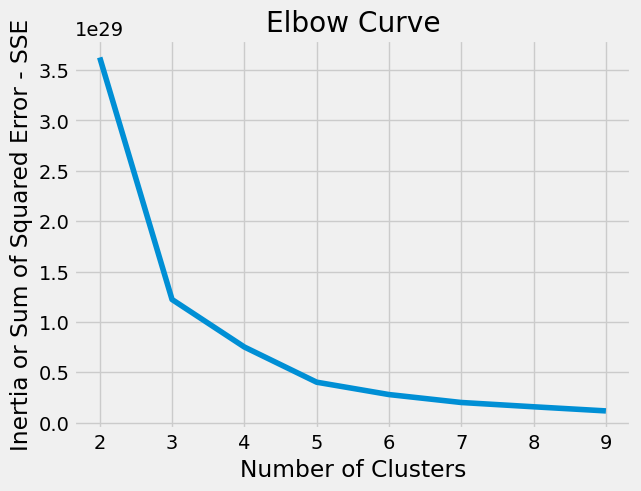

In [38]:
#using elbow method to determine the number of clusters to use

X = combined_df[['monthly_mean_return', 'montly_variance']].values
inertia_list = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)#sum of squares errors or residuals

# plot of elbow method

plt.plot(range(2,10), inertia_list)
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia or Sum of Squared Error - SSE')
       

In [39]:
# Get and show the labels or groups for each stock:
# Running K-means with 3 centroids

kmeans = KMeans(n_clusters = 3).fit(X)
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# add labels to data set for stock identification
combined_df['cluster_labels'] = labels
combined_df.head()


,Date,Low,Open,Volume,High,Close,Adjusted Close,pct_change,annual_mean_return,annual_variance,cluster_labels,monthly_mean_return,montly_variance
filename,,,,,,,,,,,,,
AAL.csv,25-10-2006,47.910000,50.299999,2598900.0,50.650002,48.509998,45.732395,-0.041115,294.520320,11458.897722,0,0.223124,63.188854
AAL.csv,26-10-2006,48.730000,49.860001,2092200.0,50.799999,49.430000,46.599709,0.018965,298.952641,11253.182612,0,2.051966,63.044128
AAL.csv,27-10-2006,48.860001,48.950001,1214000.0,50.480000,49.360001,46.533722,-0.001416,267.383216,11082.378571,0,2.456893,56.285024
AAL.csv,30-10-2006,49.400002,49.400002,1530500.0,51.490002,51.279999,48.343777,0.038898,270.526646,10963.089506,0,3.292350,56.816176
AAL.csv,31-10-2006,49.150002,51.290001,1881000.0,51.650002,49.860001,47.005089,-0.027691,249.194290,10823.212346,0,1.707869,56.579551


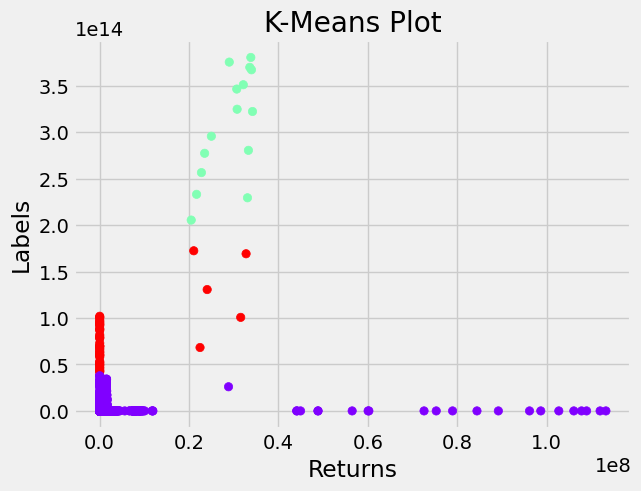

In [41]:
# Plotting the clusters
plt.scatter(X[:,0],X[:,1], c = labels, cmap = "rainbow")
plt.title("K-Means Plot")
plt.xlabel('Returns')
plt.ylabel("Labels")
plt.show()

Now based on the stock labels we can choose stocks from the different clusters to ensure the stocks are different enough and avoid putting all eggs in one basket.
The purple color dots have the stocks that have been labled 0, the red ones belong to 1 and the green belongs to label 2

